# PIC 16A Final Project
## Names: Chelsea Chen and Zoe Lu


In [1]:
# list of all libraries and imports
import numpy as np
import pandas as pd
import nltk
import re
import pickle
import sklearn

# Loading Datasets

In [2]:
df = pd.read_csv("fake_job_postings.csv")

In [3]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
df.shape

(17880, 18)

# EDA

<AxesSubplot:title={'center':'Counts of Real and Fake Job Postings'}>

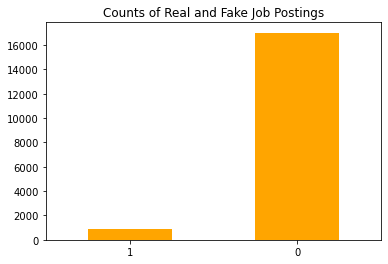

In [5]:
# creating barchart that is sorted with the y axis as counts of how many jobs were actually real or fake (x axis)
df['fraudulent'].value_counts().sort_values().plot.bar(rot = 0, color = "orange", title = "Counts of Real and Fake Job Postings")

<AxesSubplot:title={'center':'Counts of Employment Type'}>

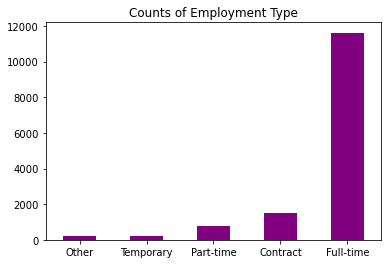

In [6]:
# creating barchart that is sorted with the y axis as counts of for each job employment type (x axis)
df['employment_type'].value_counts().sort_values().plot.bar(rot = 0, color = "purple", title = "Counts of Employment Type")

In [7]:
df["description"][0]

'Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and curated recipe hub, is currently interviewing full- and part-time unpaid interns to work in a small team of editors, executives, and developers in its New York City headquarters.Reproducing and/or repackaging existing Food52 content for a number of partner sites, such as Huffington Post, Yahoo, Buzzfeed, and more in their various content management systemsResearching blogs and websites for the Provisions by Food52 Affiliate ProgramAssisting in day-to-day affiliate program support, such as screening affiliates and assisting in any affiliate inquiriesSupporting with PR &amp; Events when neededHelping with office administrative work, such as filing, mailing, and preparing for meetingsWorking with developers to document bugs and suggest improvements to the siteSupporting the marketing and executive staff'

# Pre-Processing

## Designing Pre-Processing Class

#### Cleaning Text

In [8]:
import re
import nltk
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /Users/zoelu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
from Pre_Process import Pre_Process

[nltk_data] Downloading package stopwords to /Users/zoelu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# demonstration of an exception from this class - integer input
bad = [1,2,3]
Pre_Process(bad)

Input must be of type string
An error has occured from you input. Make sure it is of type string and a vector of at least length 1


[nltk_data] Downloading package stopwords to /Users/zoelu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
df["description"]

0        Food52, a fast-growing, James Beard Award-winn...
1        Organised - Focused - Vibrant - Awesome!Do you...
2        Our client, located in Houston, is actively se...
3        THE COMPANY: ESRI – Environmental Systems Rese...
4        JOB TITLE: Itemization Review ManagerLOCATION:...
                               ...                        
17875    Just in case this is the first time you’ve vis...
17876    The Payroll Accountant will focus primarily on...
17877    Experienced Project Cost Control Staff Enginee...
17878    Nemsia Studios is looking for an experienced v...
17879    Who are we?Vend is an award winning web based ...
Name: description, Length: 17880, dtype: object

In [12]:
# cleaned text
documents = df["description"]
documents = Pre_Process(df["description"]).remove_special_char(documents)
documents = Pre_Process(df["description"]).remove_single_char(documents)
documents = Pre_Process(df["description"]).remove_mult_space(documents)
documents = Pre_Process(df["description"]).to_lower(documents)
documents = Pre_Process(df["description"]).remove_stopwords(documents)
documents = Pre_Process(df["description"]).lamentize(documents)

documents[0]

[nltk_data] Downloading package stopwords to /Users/zoelu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/zoelu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/zoelu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/zoelu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/zoelu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/zoelu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'food52 fast growing james beard award winning online food community crowd sourced curated recipe hub currently interviewing full part time unpaid intern work small team editor executive developer new york city headquarters reproducing repackaging existing food52 content number partner site huffington post yahoo buzzfeed various content management systemsresearching blog website provision food52 affiliate programassisting day day affiliate program support screening affiliate assisting affiliate inquiriessupporting pr amp event neededhelping office administrative work filing mailing preparing meetingsworking developer document bug suggest improvement sitesupporting marketing executive staff'

In [13]:
df["description"][1]

"Organised - Focused - Vibrant - Awesome!Do you have a passion for customer service? Slick typing skills? Maybe Account Management? ...And think administration is cooler than a polar bear on a jetski? Then we need to hear you!\xa0We are the Cloud Video Production Service and opperating on a glodal level. Yeah, it's pretty cool. Serious about\xa0delivering a world class product and excellent customer service.Our rapidly expanding business is looking for a talented Project Manager to manage the successful delivery of video projects, manage client communications and drive the production process. Work with some of the coolest brands on the planet and learn from a global team that are representing NZ is a huge way!We are entering the next growth stage of our business and growing quickly internationally. \xa0Therefore, the position is bursting with opportunity for the right person entering the business at the right time.\xa090 Seconds, the worlds Cloud Video Production Service -\xa0http://90

In [14]:
len(documents)

17880

In [15]:
# now description is pre-processed
df["documents_processed"] = documents
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,documents_processed
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,food52 fast growing james beard award winning ...
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,organised focused vibrant awesome passion cust...
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,client located houston actively seeking experi...
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,company esri environmental system research ins...
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,job title itemization review managerlocation f...


## WordCloud Visual

In [16]:
# installing wordcloud software
# !pip install wordcloud
from wordcloud import WordCloud 

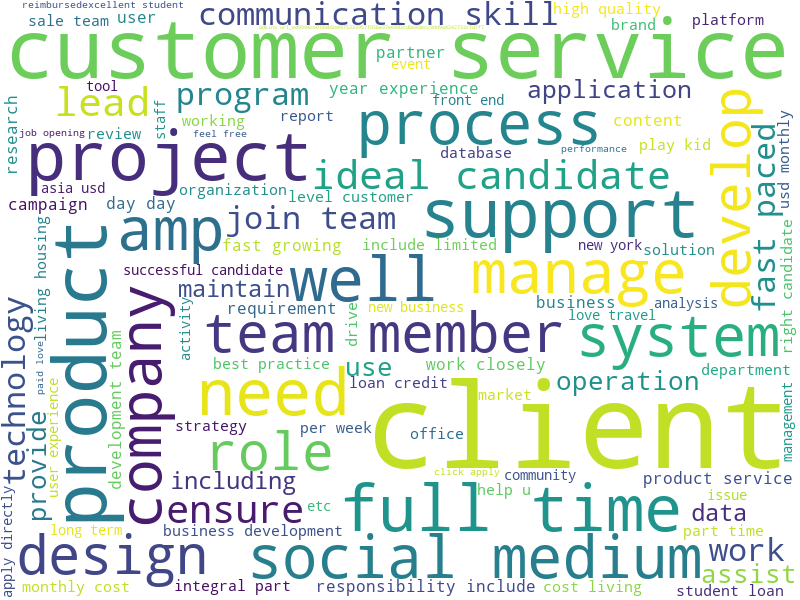

In [17]:
# creating the word cloud and setting certain parameters like background color, size, number of words etc
wordcloud = WordCloud(background_color = 'white', max_words = 200, width = 800, 
                      height = 600, contour_width = 10, contour_color = 'steelblue')

# joining the documents_processed column so that wordcloud function can count the frequencies
wordcloud.generate(' '.join(df['documents_processed']))

# printing the image
wordcloud.to_image()

In [18]:
# store predictor column of interest in variable X
X = df["description"]

In [19]:
# cleaning up description data
documents = []
stemmer = WordNetLemmatizer()
stop_words = stopwords.words('english')
for i in range(0, len(X)):
    # Remove all the special characters, like parathesis
    document = re.sub(r'\W', ' ', str(X[i]))
    # remove all single characters: like a, b, c, d
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    # Converting to Lowercase
    document = document.lower()
    # Lemmatization
    document = document.split()
    
    # remove stop words
    document = [word for word in document if word not in stop_words]
    
    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    documents.append(document)

In [20]:
len(documents)

17880

In [21]:
# now description is pre-processed
df["documents_processed"] = documents
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,documents_processed
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,food52 fast growing james beard award winning ...
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,organised focused vibrant awesome passion cust...
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,client located houston actively seeking experi...
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,company esri environmental system research ins...
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,job title itemization review managerlocation f...


## TF-IDF Scoring

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

### Looking at Overall TF-IDF Scoring

In [23]:
cv = CountVectorizer() 
X = cv.fit_transform(documents)

In [24]:
tfidf_transformer = TfidfTransformer(smooth_idf=True,use_idf=True) 
tfidf_transformer.fit(X)

TfidfTransformer()

In [25]:
# storing idf scores
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"]) 

In [26]:
# idf scores sorted for overall
df_idf.sort_values(by=['idf_weights'])

,idf_weights
team,1.594036
work,1.705923
looking,1.972864
company,1.990627
service,2.029317
...,...
performancecomply,10.098347
developmentsearch,10.098347
performancecommunicate,10.098347
performancediscipline,10.098347


From here you can see that some frequent words (aka important words) are "team," "work," and "looking."

### Separate TF-IDF Scoring for Train and Test Datasets

In [27]:
# for train test split
from sklearn.model_selection import train_test_split
# for tfidf quick calc
from sklearn.feature_extraction.text import TfidfVectorizer 

#### Function that splits data and creates TF-IDF scores

In [28]:
df["documents_processed"]

0        food52 fast growing james beard award winning ...
1        organised focused vibrant awesome passion cust...
2        client located houston actively seeking experi...
3        company esri environmental system research ins...
4        job title itemization review managerlocation f...
                               ...                        
17875    case first time visited website vend award win...
17876    payroll accountant focus primarily payroll fun...
17877    experienced project cost control staff enginee...
17878    nemsia studio looking experienced visual graph...
17879    vend award winning web based point sale softwa...
Name: documents_processed, Length: 17880, dtype: object

In [29]:
def tfidf_train_test_split(X, Y, test_prcnt, random):
    '''
    This function splits the data into a train and test subset. 
    Args: X: one dimension array of cleaned string
          Y: predicting variable
          test_prcnt: ratio of how big you want test and split data to be
          random: how you want the split to be shuffled 
    Returns: tf_X_train, tf_X_test, Y_train, Y_test with the corresponding tf-idf scores
          
    
    
    '''
    # check X variable is one dimension of string for tfidf calc later
    if (X.ndim > 1):
        raise Exception("Input for X must be of one dimension")
    if (len(X) < 1):
        raise Exception("Input must be at least length 1")
    if (not isinstance(X[0], str)):
        raise Exception("Input must be of type string")  
        
    # import for train test split
    from sklearn.model_selection import train_test_split

    # split data into train test
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_prcnt, random_state = random)
    # prints train and test split dimensions for the user
    print("Train Shape: ", X_train.shape, Y_train.shape, "Test Shape: ",(X_test.shape, Y_test.shape))
    
    # import for tfidf scores
    from sklearn.feature_extraction.text import TfidfVectorizer
    
    tfidf_v = TfidfVectorizer()
    tf_X_train = tfidf_v.fit_transform(X_train)
    tf_X_test = tfidf_v.transform(X_test)
    
    return tf_X_train, tf_X_test, Y_train, Y_test
    

In [30]:
# example of exception handled - X should be 1 dimension
a,b,c,d = tfidf_train_test_split(df.head(), df["fraudulent"].head(), test_prcnt = 0.3, random = 30)

Exception: Input for X must be of one dimension

In [31]:
tf_X_train, tf_X_test, Y_train, Y_test = tfidf_train_test_split(df["documents_processed"], df["fraudulent"], test_prcnt = 0.3, random = 30)

Train Shape:  (12516,) (12516,) Test Shape:  ((5364,), (5364,))


# Modeling

In [32]:
# some imports for checking models

# for classification report
from sklearn.metrics import classification_report
# for confusion matrix visual
import matplotlib.pyplot as plt
from sklearn import metrics
# for cross validation scores
from sklearn.model_selection import cross_val_score

## Support Vector Machine

In [33]:
# importing svm model
from sklearn.svm import LinearSVC
svm = LinearSVC(random_state=0)

In [34]:
# fitting model
svm.fit(tf_X_train, Y_train)

LinearSVC(random_state=0)

In [35]:
# predicting on test dataset
y_test_pred_svm = svm.predict(tf_X_test)

In [36]:
# looking at classification report
report_svm = classification_report(Y_test, y_test_pred_svm, output_dict=True)
report_svm

{'0': {'precision': 0.9811102544333077,
  'recall': 0.9990186457311089,
  'f1-score': 0.9899834678595741,
  'support': 5095},
 '1': {'precision': 0.9715909090909091,
  'recall': 0.6356877323420075,
  'f1-score': 0.7685393258426966,
  'support': 269},
 'accuracy': 0.9807979120059657,
 'macro avg': {'precision': 0.9763505817621083,
  'recall': 0.8173531890365582,
  'f1-score': 0.8792613968511354,
  'support': 5364},
 'weighted avg': {'precision': 0.9806328674278817,
  'recall': 0.9807979120059657,
  'f1-score': 0.9788782340410546,
  'support': 5364}}

Based on the classification report, our accuracy for classifying 0 or not fraudulent jobs is 99.9% while the accuracy for classifying 1 or fraudulent jobs is 63.57%. This is not the best accuracy score for 1's and can be better visualized in a confusion matrix.

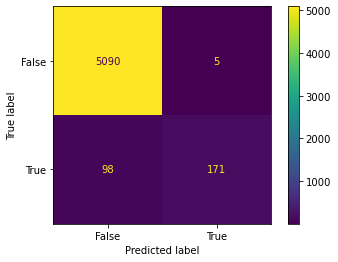

In [37]:
# confusion matrix visual
confusion_matrix = metrics.confusion_matrix(Y_test, y_test_pred_svm)
display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
display.plot()
plt.show()

## Logistic Regression

In [38]:
# importing log reg model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000,solver="saga")

In [39]:
# fitting model
logreg.fit(tf_X_train,Y_train)

LogisticRegression(max_iter=1000, solver='saga')

In [40]:
# predicting on test dataset
y_test_pred_logreg = logreg.predict(tf_X_test)

In [41]:
report = classification_report(Y_test, y_test_pred_logreg, output_dict=True)
report

{'0': {'precision': 0.9627669627669627,
  'recall': 0.9998037291462217,
  'f1-score': 0.9809358752166377,
  'support': 5095},
 '1': {'precision': 0.9863013698630136,
  'recall': 0.26765799256505574,
  'f1-score': 0.4210526315789473,
  'support': 269},
 'accuracy': 0.9630872483221476,
 'macro avg': {'precision': 0.9745341663149882,
  'recall': 0.6337308608556387,
  'f1-score': 0.7009942533977925,
  'support': 5364},
 'weighted avg': {'precision': 0.9639471931004522,
  'recall': 0.9630872483221476,
  'f1-score': 0.9528582106867087,
  'support': 5364}}

Based on the classification report, our accuracy for classifying 0 or not fraudulent jobs is 99.98% while the accuracy for classifying 1 or fraudulent jobs is 26.76%. This is definitely not ideal and can be better visualized in a confusion matrix.

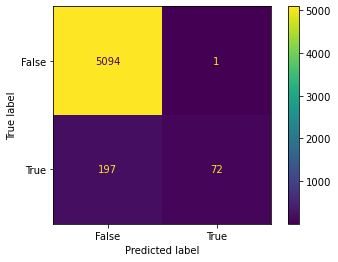

In [42]:
# confusion matrix visual
confusion_matrix = metrics.confusion_matrix(Y_test, y_test_pred_logreg)
display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
display.plot()
plt.show()

# Conclusion


In the end, based on the models that we tried out. We decided that Support Vector Machine was the better model to use since it performed better in classifying fake jobs and had better accuracies. We can improve this project in the future by trying out other models as well.